# TP n°4 - Les techniques de transformation des variables

- [Documentation Matplotlib](http://matplotlib.org/)
- [Documentation Seaborn](https://seaborn.pydata.org/)

Il est souvent nécessaire d'apporter quelques transformations sur les variables du dataset étudié.
Il est important de noter que la transformation des données doit être effectuée avec soin, car elle peut affecter les résultats de l'analyse. Il est recommandé de vérifier les effets de chaque transformation sur les données et de choisir celle qui donne les meilleurs résultats.

On peut distinguer plusieurs techniques de preprocessing selon le cas:

## Normalization
C'est la standardisation ou la normalisation des valeurs : Si les valeurs des différentes variables ont des échelles différentes, cela peut affecter les résultats de l'analyse. Par exemple, si une variable prend des valeurs allant de 0 à 1 000 et une autre de 0 à 10, cela peut biaiser les résultats de l'analyse. Dans ce cas, il peut être utile de standardiser les valeurs en utilisant une technique de normalisation, comme les méthodes L1 et L2.

### Exercice 1
- Définir les méthodes de normalisation L1 et L2.
- Créer une matrice 3x3 de valeurs aléatoires.
- Normaliser cette matrice en utilisant L1 puis avec L2.

In [10]:
from sklearn import preprocessing
import numpy as np

matrice = np.random.rand(3,3)

l1 = preprocessing.normalize(matrice, norm='l1')
l2 = preprocessing.normalize(matrice, norm='l2')

# Somme des valeurs absolues = 1
print(f"L1-normalized data : \n{l1}")
# Somme des carrés = 1
print(f"L2-normalized data : \n{l2}")

L1-normalized data : 
[[0.56364533 0.13287668 0.30347799]
 [0.10327928 0.74063632 0.1560844 ]
 [0.23204599 0.49313432 0.27481969]]
L2-normalized data : 
[[0.86210996 0.20323829 0.46417736]
 [0.13519677 0.96952299 0.20432082]
 [0.38017209 0.80792564 0.4502503 ]]


## Label encoding
Cette technique permet de d'encoder les variables catégorielles.
Les modèles de data mining sont souvent conçus pour traiter des variables **quantitatives** et ne peuvent pas directement traiter les variables catégorielles. Dans ce cas, il peut être utile de transformer les variables catégorielles en variables numériques, en utilisant des techniques d'encodage telles que l'encodage "one-hot".
### Exercice 2
Utiliser cette technique sur un dataset de votre choix.

In [34]:
import pandas as pd

df = pd.read_csv('../datasets/sales.csv')

# Utilise le label encoding sur le dataframe
le = preprocessing.LabelEncoder()
df['le_encoded_division'] = le.fit_transform(df['division'])
print(df)

            division  level of education  training level  work experience  \
0  computer software        some college               3                7   
1           printers  associate's degree               0                5   
2           printers  associate's degree               1                5   
3        peripherals        some college               1                9   
4    office supplies  associate's degree               0                3   
5        peripherals   bachelor's degree               2               12   
6        peripherals   bachelor's degree               1                6   
7           printers   bachelor's degree               0                4   
8        peripherals  associate's degree               0                6   
9        peripherals        some college               1                1   

   salary   sales  le_encoded_division  
0  111642  462905                    0  
1   83988  262499                    3  
2   91784  339473            

## One-Hot encoding
### Exercice 3
Utiliser cette technique sur un dataset de votre choix.

In [39]:
df = pd.read_csv('../datasets/sales.csv')
data_dummies = pd.get_dummies(df)
print(data_dummies)
data_dummies.head()

   training level  work experience  salary   sales  \
0               3                7  111642  462905   
1               0                5   83988  262499   
2               1                5   91784  339473   
3               1                9   99755  409342   
4               0                3   70694  173665   
5               2               12  131177  590386   
6               1                6   89342  312963   
7               0                4   68702  134486   
8               0                6   86764  244409   
9               1                1   64694  145215   

   division_computer software  division_office supplies  division_peripherals  \
0                           1                         0                     0   
1                           0                         0                     0   
2                           0                         0                     0   
3                           0                         0                     1   


,training level,work experience,salary,sales,division_computer software,division_office supplies,division_peripherals,division_printers,level of education_associate's degree,level of education_bachelor's degree,level of education_some college
0,3,7,111642,462905,1,0,0,0,0,0,1
1,0,5,83988,262499,0,0,0,1,1,0,0
2,1,5,91784,339473,0,0,0,1,1,0,0
3,1,9,99755,409342,0,0,1,0,0,0,1
4,0,3,70694,173665,0,1,0,0,1,0,0


## Valeurs aberrantes
Pour traiter les valeurs aberrantes : Les valeurs aberrantes (ou "outliers") peuvent affecter les résultats de l'analyse, en particulier si elles sont trop éloignées de la distribution normale des données. Dans ce cas, il peut être utile de transformer ces valeurs en utilisant une technique de transformation telle que la transformation logarithmique ou la transformation inverse. Dans certains cas, il est préferable de supprimer simplement les valeurs aberrantes.
### Exercice 4
- Utiliser le dataset `salaires-postes.csv`.
- Ajouter des valeurs aberrantes si besoin.
- Quel graphique proposez-vous pour bien visualiser les valeurs aberrantes ?  Utilisez le.
- Utiliser une technique de transformation des valeurs aberrantes.

<AxesSubplot: xlabel='poste', ylabel='salaire'>

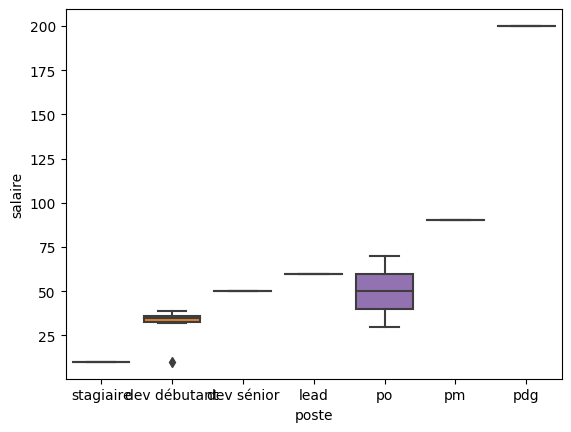

In [42]:
import seaborn as sns
df = pd.read_csv("../datasets/salaires-postes.csv")
sns.boxplot(data=df, x="poste", y="salaire")

## Valeurs manquantes

Une autre technique qui permet d'imputer des données manquantes. Les valeurs manquantes peuvent également affecter les résultats de l'analyse, en particulier si elles sont présentes en grand nombre. Dans ce cas, il peut être utile de transformer ces valeurs en utilisant une technique d'imputation telle que la moyenne...

### Exercice 5
- Utilisez le dataset `sales.csv` et afficher sa description et ses informations
- Présente-t-il des valeurs manquantes ? Si oui, affichez le pourcentage des valeurs manquantes.
- Affichez un graphique adéquat qui montre le pourcentage des valeurs manquantes par variable.

In [ ]:
# TODO

# TP suivant ?
TP n°5: La réduction des variables par sélection.
